#Dataset subject:
###Profit prediction and future trend of the Google stock market
#In this dataset we preprocessing the data such as analyz, handle null and missing values, check outlier probablity and bring the numbers to one scale
###I hope this be usefull
####Lets start...

###As usuall we import our needed libraries and pur dataset

In [174]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from statsmodels.tsa.stattools import adfuller

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MyFiles-Kaggle-AI/numpy,pandas/Google.csv')
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,8/19/2004
1,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,8/20/2004
2,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,8/23/2004
3,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,8/24/2004
4,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,8/25/2004


In [ ]:
df.shape

(4677, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4677.000000,4676.000000,4676.000000,4675.000000,4677.000000,4.677000e+03
mean,38.255309,38.663605,37.869074,38.280917,38.265822,1.226090e+08
std,35.540477,35.943457,35.162399,35.556055,35.555944,1.529406e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.657307,12.775738,12.489810,12.649711,12.640869,2.968400e+07
50%,25.577278,25.781421,25.264660,25.543009,25.534290,6.698614e+07
75%,54.528500,55.235626,53.912251,54.548000,54.546501,1.527946e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677 entries, 0 to 4676
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4677 non-null   float64
 1   High       4676 non-null   float64
 2   Low        4676 non-null   float64
 3   Close      4675 non-null   float64
 4   Adj Close  4677 non-null   float64
 5   Volume     4677 non-null   int64  
 6   Date       4677 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 255.9+ KB


##Here as you see we have few null values,so we replace these null values next value in next row in same columns

In [ ]:
df.isnull().sum()

Open         0
High         1
Low          1
Close        2
Adj Close    0
Volume       0
Date         0
dtype: int64

In [180]:
df.ffill()

,Open,High,Low,Close,Adj Close,Volume,Date
0,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,8/19/2004
1,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,8/20/2004
2,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,8/23/2004
3,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,8/24/2004
4,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,8/25/2004
...,...,...,...,...,...,...,...
4672,90.565002,93.080002,89.940002,91.660004,91.660004,31508600,3/13/2023
4673,93.070000,94.830002,92.779999,94.250000,94.250000,32303900,3/14/2023
4674,93.540001,97.250000,93.040001,96.550003,96.550003,38367300,3/15/2023
4675,96.570000,101.970001,95.870003,101.070000,101.070000,54499500,3/16/2023


In [181]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

##we delete our dataset null values, now we check stationarity of dataset

<ipython-input-88-8d19c7a8b3b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr() , annot=True , fmt='.1f')


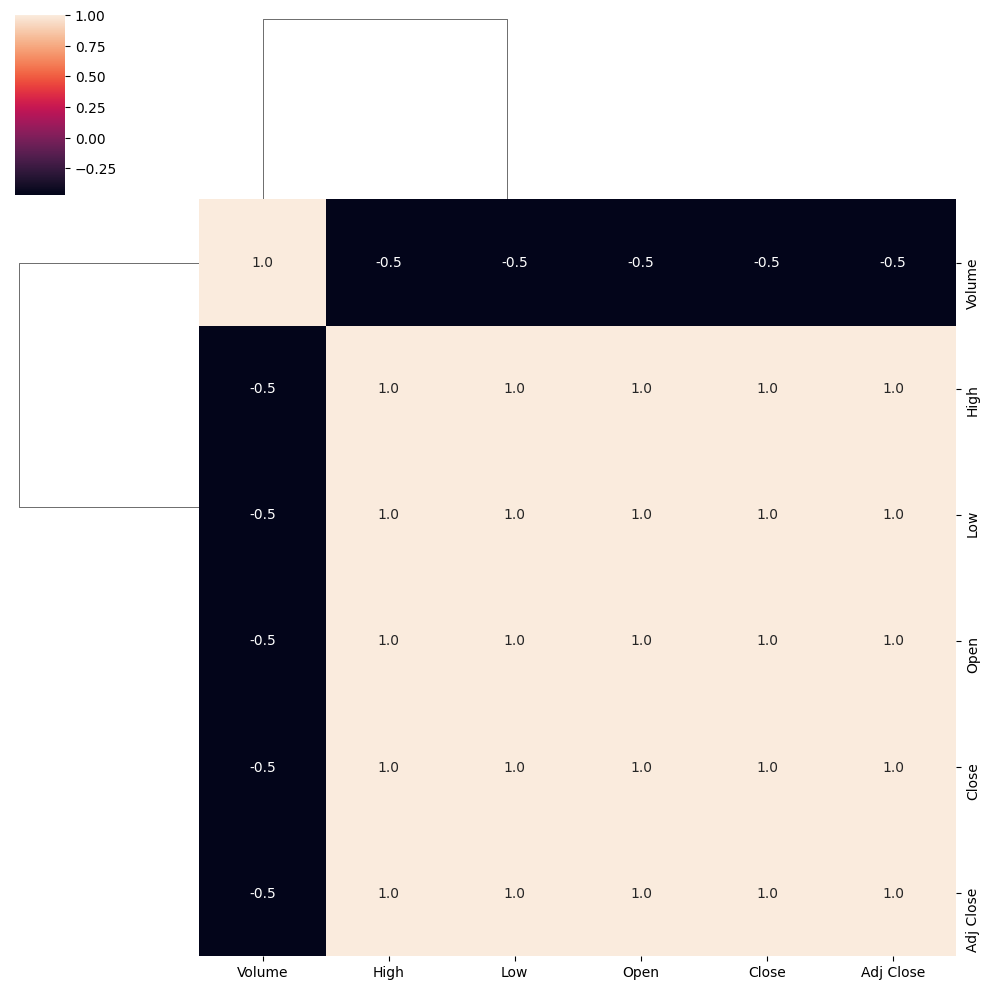

In [ ]:
sns.clustermap(df.corr() , annot=True , fmt='.1f')

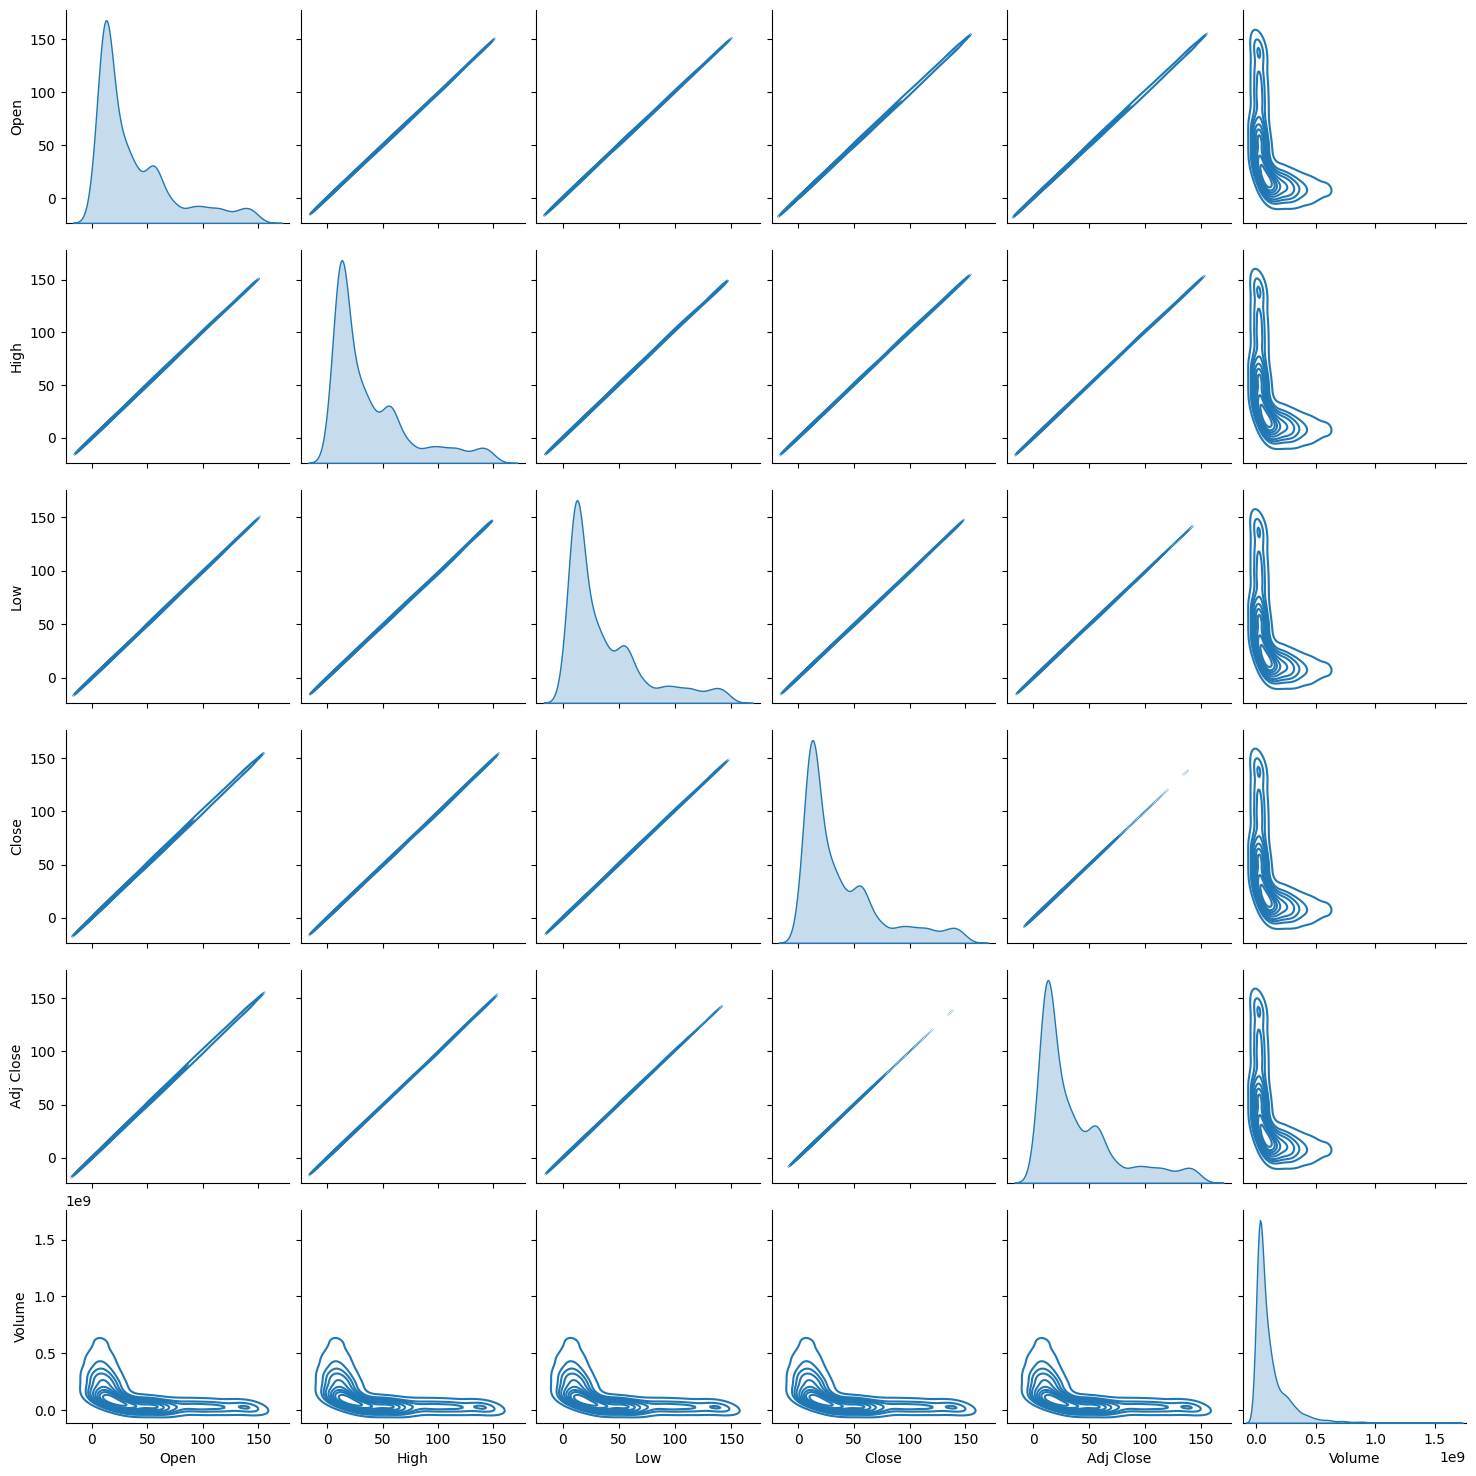

In [ ]:
sns.pairplot(df , kind="kde")

<Axes: >

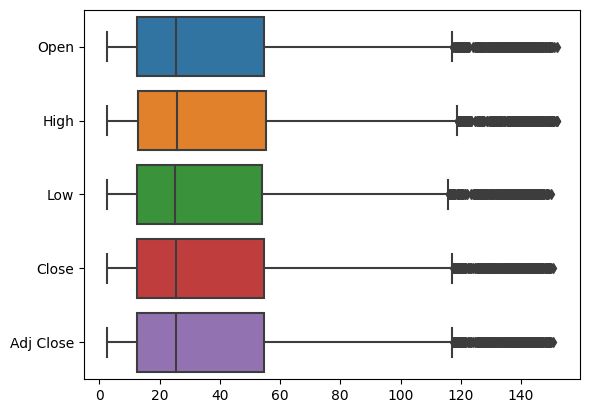

In [ ]:
sns.boxplot(data=df[["Open", "High", "Low", "Close", "Adj Close"]], orient="h")

In [122]:
df_copy = df.copy()
df_copy.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,8/19/2004
1,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,8/20/2004
2,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,8/23/2004
3,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,8/24/2004
4,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,8/25/2004


In [123]:
df_copy = df_copy.drop(['Date'], axis=1)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

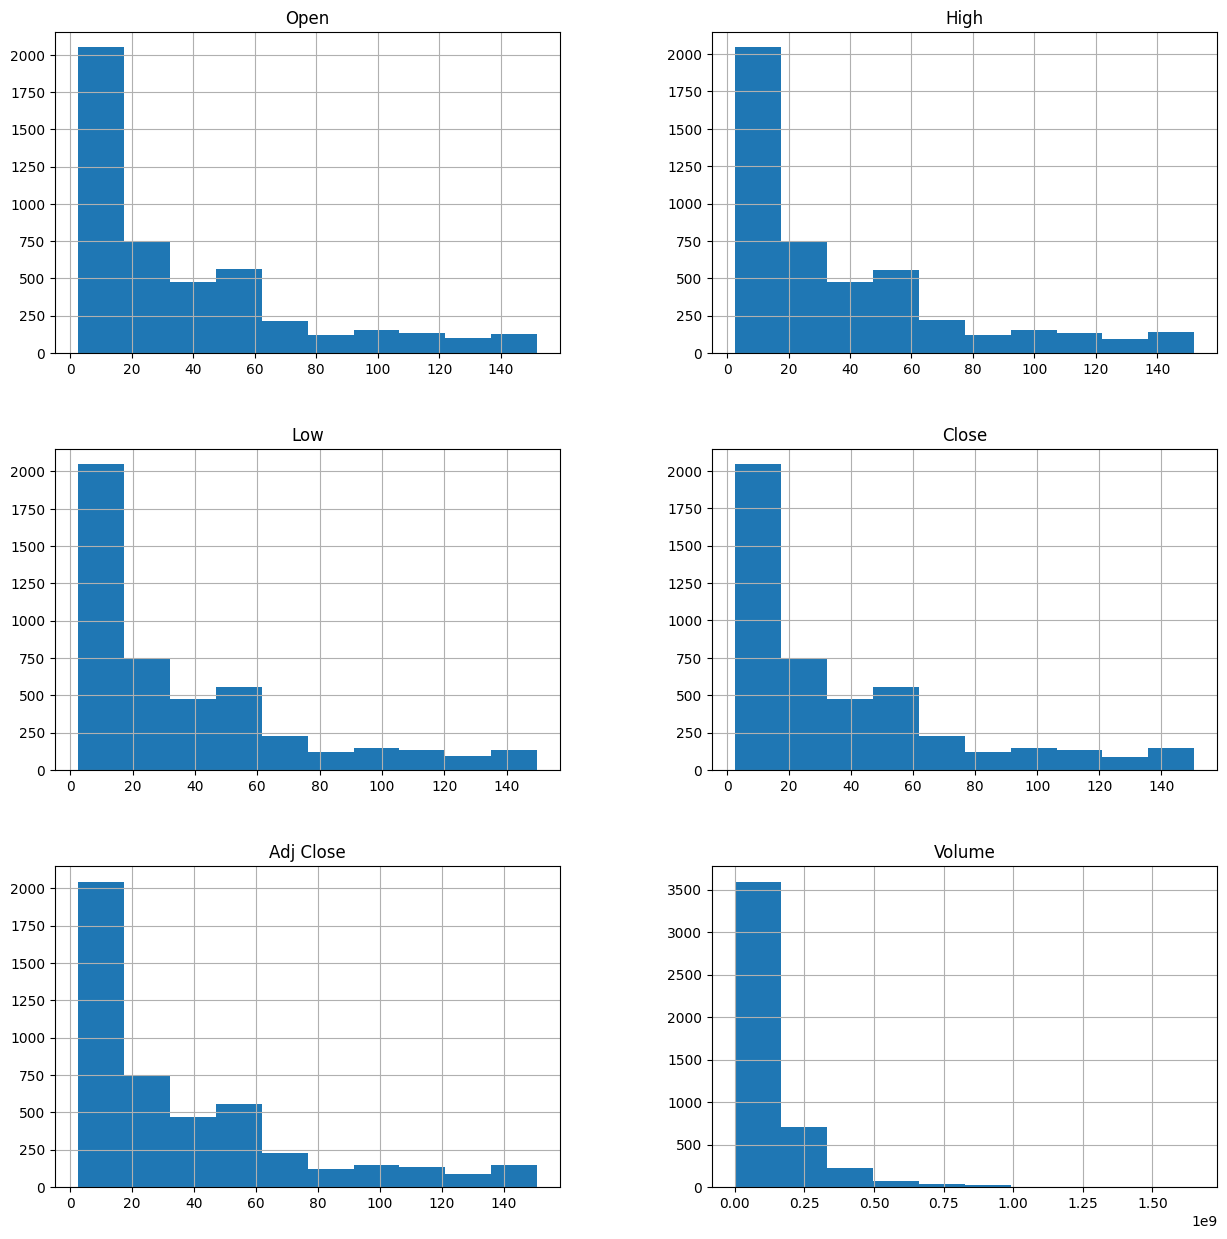

In [173]:
df_copy.hist(figsize=(15, 15))

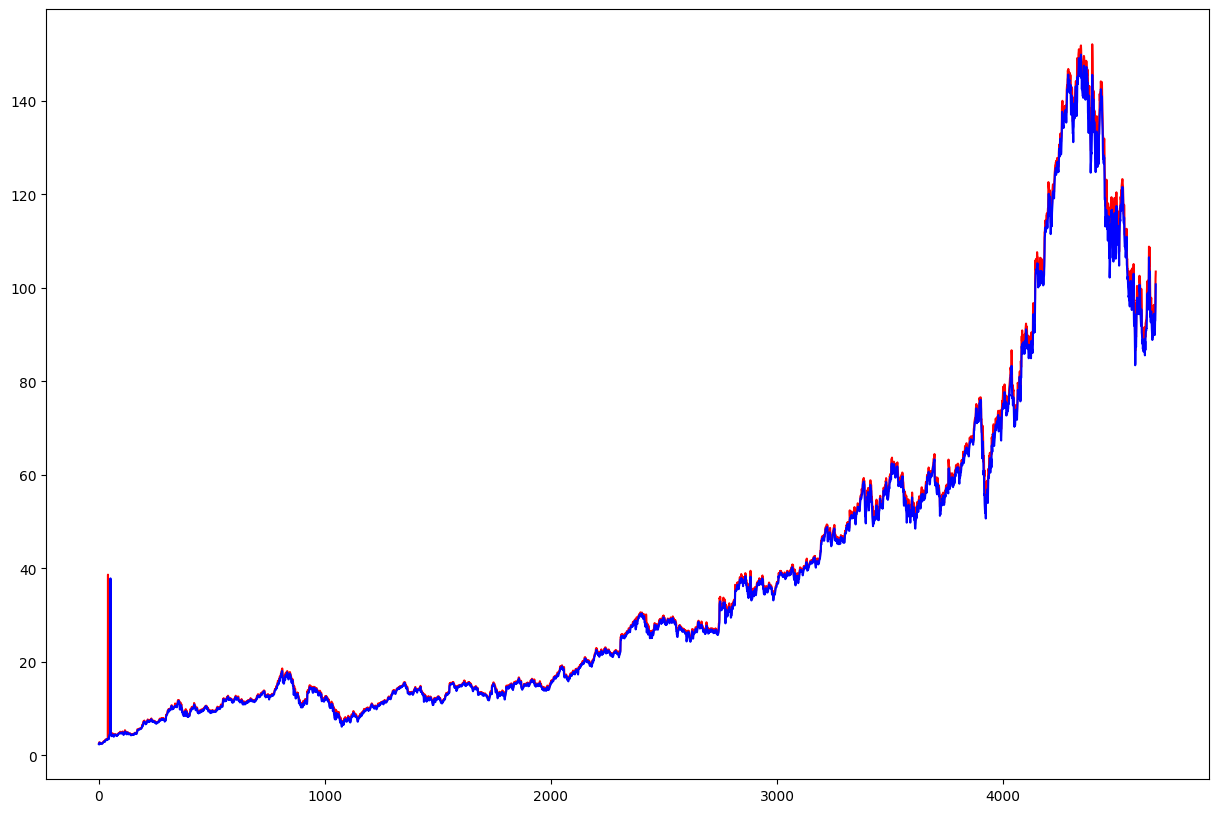

In [165]:
plt.figure(figsize=(15, 10))
plt.plot(df['High'], 'r', label='HIGH')
plt.plot(df['Low'], 'b', label='Low')
plt.show()

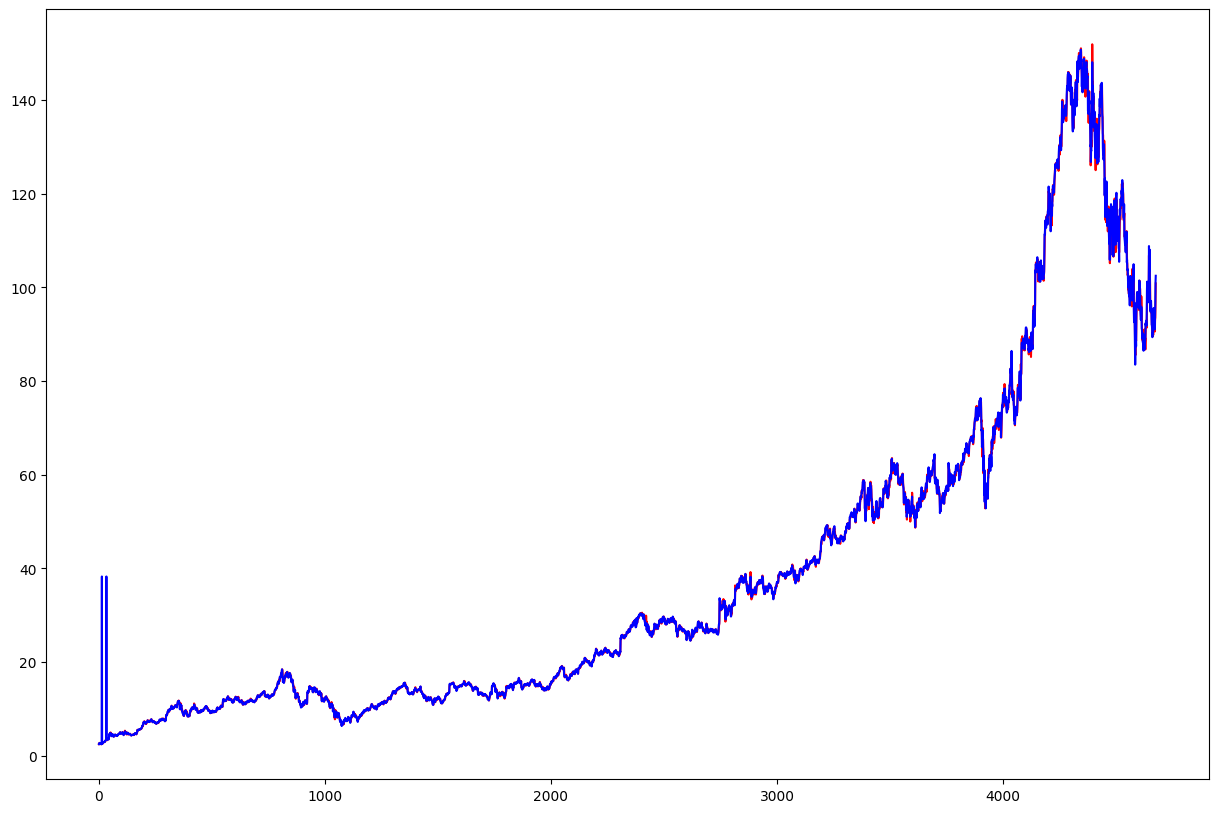

In [167]:
plt.figure(figsize=(15, 10))
plt.plot(df['Open'], 'r', label='Open')
plt.plot(df['Close'], 'b', label='Close')
plt.show()

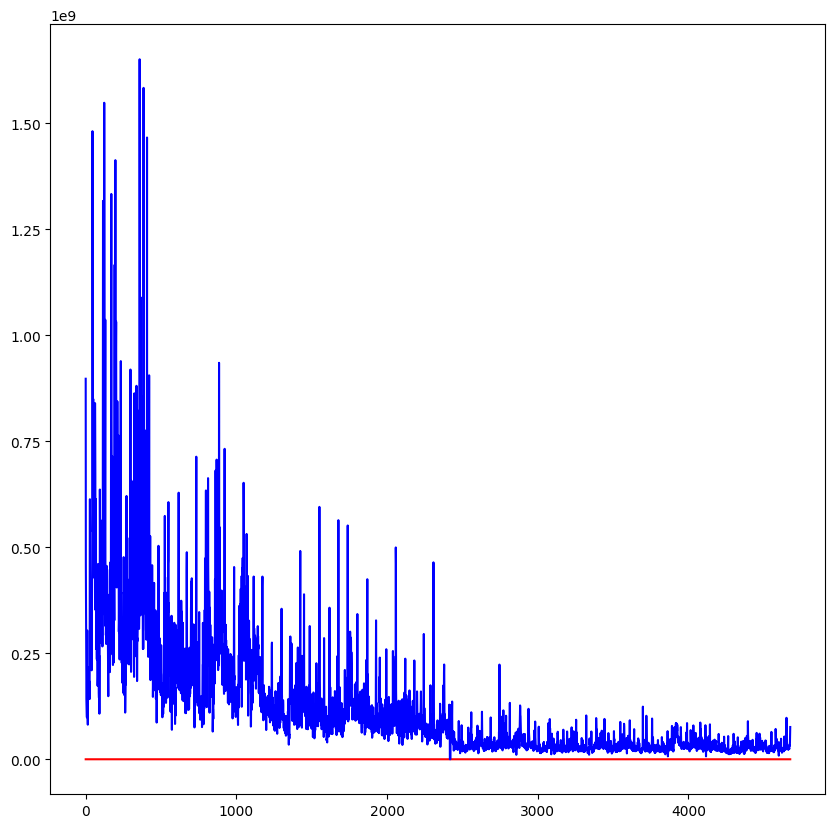

In [171]:
plt.figure(figsize=(10, 10))
plt.plot(df['Adj Close'], 'r', label='Adj')
plt.plot(df['Volume'], 'b', label='Volume')
plt.show()

In [177]:
res = adfuller(df_copy['Adj Close'], autolag='AIC')
print(f'Ads statistics: {res[0]}')

Ads statistics: 0.013146072166040619


###Our data is not stationary and we should make these data stationary for better predict
###We use statistic method

In [178]:
df_copy['return / day'] = df_copy['Adj Close'].pct_change()

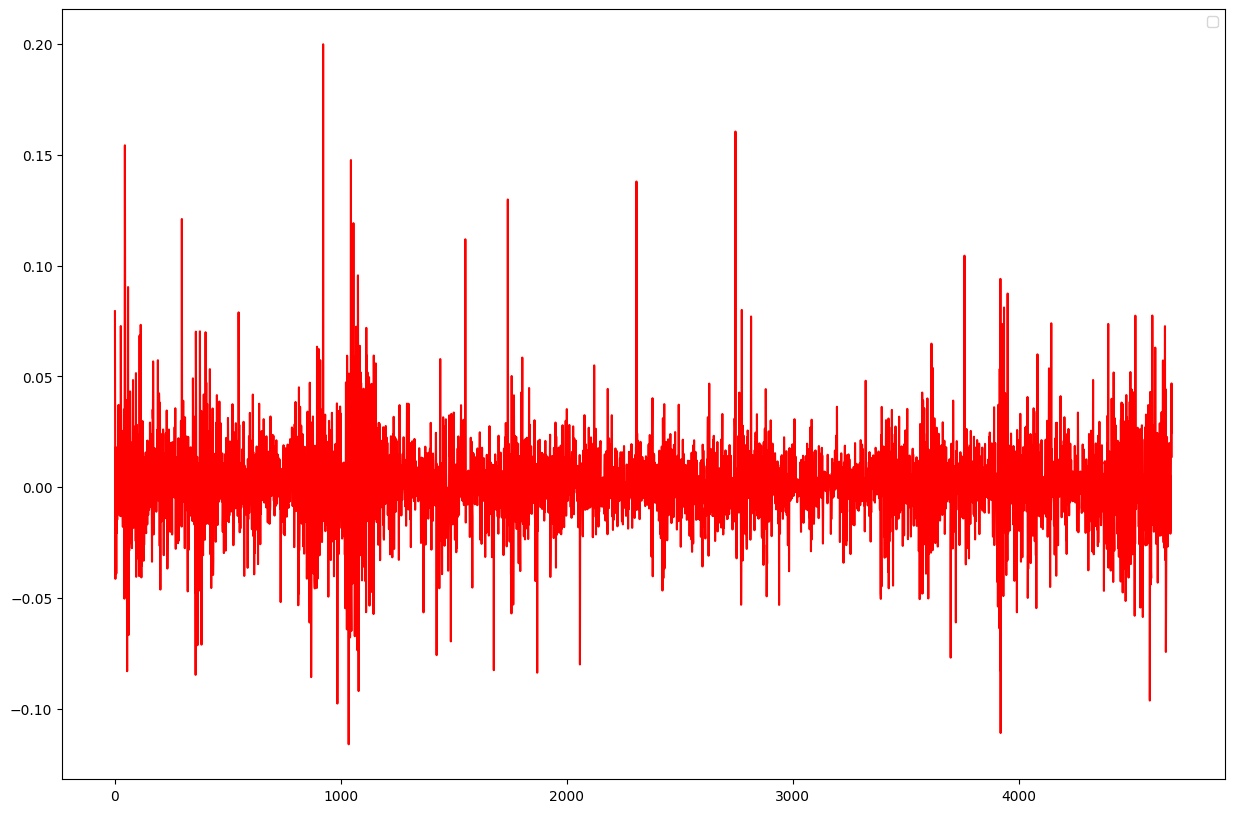

In [179]:
plt.figure(figsize=(15, 10))
plt.plot(df_copy['return / day'], color='r')
plt.legend()
plt.show() 

##Now our dataset is more stationary
##we drop date column to bring our data in same scale

In [195]:
df_copy['return / day']= df_copy['return / day'].bfill()

In [196]:
df_copy.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
return / day    0
dtype: int64

In [197]:
df_copy.head()

,Open,High,Low,Close,Adj Close,Volume,return / day
0,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,0.079430
1,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,0.079430
2,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,0.010064
3,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,-0.041408
4,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,0.010775


In [ ]:
# df_copy = df_copy.astype(int)
features = df_copy.columns.tolist()

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20)
df['lof_score'] = lof.fit_predict(df[features])
outliers = df[df['lof_score'] == -1]

print(f"Found {len(outliers)} outliers at indices {outliers.index.tolist()}")

df.drop('lof_score' , axis=1 , inplace=True) #Returning the data frame to the previous state

Found 204 outliers at indices [13, 33, 40, 42, 46, 51, 59, 66, 104, 115, 116, 117, 169, 192, 193, 194, 195, 323, 337, 358, 359, 368, 384, 427, 435, 483, 525, 549, 588, 598, 617, 792, 794, 812, 814, 816, 838, 852, 853, 858, 859, 861, 862, 863, 864, 865, 868, 869, 880, 889, 903, 909, 912, 924, 930, 931, 932, 935, 945, 973, 981, 982, 983, 989, 1020, 1023, 1027, 1028, 1030, 1035, 1036, 1038, 1039, 1041, 1045, 1046, 1048, 1056, 1062, 1067, 1068, 1072, 1073, 1074, 1075, 1079, 1084, 1088, 1112, 1293, 1355, 1366, 1436, 1438, 1489, 1552, 1582, 1618, 1639, 1753, 1754, 1756, 1763, 1766, 1789, 1796, 1861, 1927, 1928, 1952, 2058, 2059, 2240, 2375, 2380, 2414, 2421, 2423, 2424, 2427, 2430, 2432, 2554, 2555, 2617, 2624, 2630, 2742, 2743, 2745, 2772, 2773, 2815, 2870, 2883, 2884, 2888, 2890, 2985, 3080, 3082, 3162, 3164, 3165, 3166, 3167, 3168, 3191, 3192, 3193, 3194, 3224, 3236, 3257, 3389, 3390, 3392, 3406, 3414, 3421, 3424, 3509, 3561, 3567, 3571, 3573, 3574, 3599, 3611, 3613, 3709, 3779, 3908, 391